<a href="https://colab.research.google.com/github/dkharche/Fashion_object_detection/blob/main/Fashion_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
print(tf.__version__)

2.8.2


In [7]:
fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [61]:
class_name = ['T-shirt/top','Trousers','pullovers','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [8]:
import numpy as np
import matplotlib.pyplot as plt

(training_images,training_labels), (test_images,test_labels)= fashion_mnist.load_data()

In [63]:
training_images.shape


(60000, 28, 28)

In [64]:
test_images.shape

(10000, 28, 28)

In [9]:
training_images=training_images/255.0
test_images=test_images/255.0

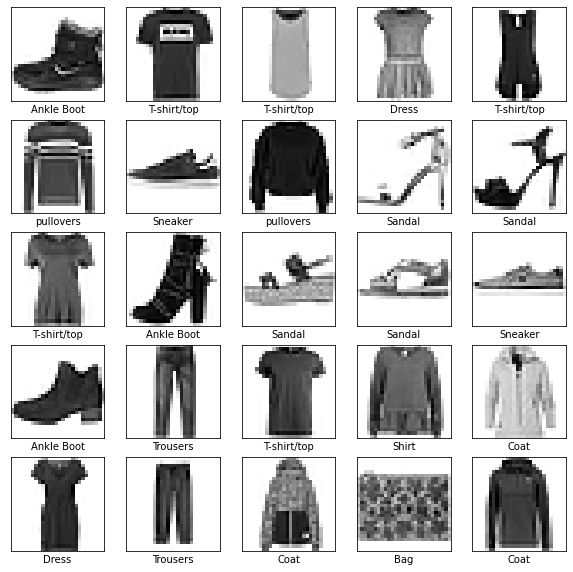

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  
  plt.imshow(training_images[i],cmap=plt.cm.binary)
  
  plt.xlabel(class_name[training_labels[i]])


The label for the training image is 3


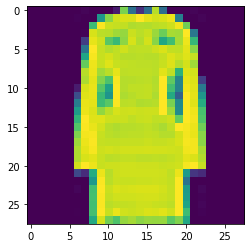

In [47]:
import matplotlib.pyplot as plt
index = 500
plt.imshow(training_images[index])
print('The label for the training image is', training_labels[index])

In [17]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
print(model)


In [18]:
input = np.array([[4.0,3.0,1.0,2.0]])
input = tf.convert_to_tensor(input)

print(input.numpy())

output=tf.keras.activations.softmax(input)
print('Output =>',output)

[[4. 3. 1. 2.]]
Output => tf.Tensor([[0.64391426 0.23688282 0.0320586  0.08714432]], shape=(1, 4), dtype=float64)


In [20]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=50)


Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7443 - accuracy: 0.7618
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5151 - accuracy: 0.8245
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4698 - accuracy: 0.8393
Epoch 4/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4450 - accuracy: 0.8462
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4271 - accuracy: 0.8521
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4135 - accuracy: 0.8567
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4014 - accuracy: 0.8613
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3919 - accuracy: 0.8630
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3832 - accuracy: 0.8654
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.376

In [21]:
model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8778


[0.3382103741168976, 0.8777999877929688]

In [52]:
x=model.predict(test_images) #classification

[[7.3421370e-06 4.1965680e-09 3.7010489e-06 ... 2.3540223e-02
  7.9875748e-04 9.6376073e-01]
 [6.1947212e-05 2.6940514e-09 9.9731809e-01 ... 7.0325550e-15
  7.6698171e-07 1.9174820e-14]
 [1.7837614e-05 9.9997997e-01 1.2911823e-07 ... 3.0833197e-10
  4.2458588e-09 7.4912299e-13]
 ...
 [1.5886435e-02 1.1669016e-07 1.1183459e-02 ... 3.5713504e-06
  9.6618730e-01 3.9614554e-07]
 [1.8751902e-05 9.9967957e-01 1.4732136e-06 ... 1.5442689e-07
  3.0555711e-07 1.5194067e-07]
 [3.8127699e-05 3.9141669e-06 1.1298103e-04 ... 2.2402504e-02
  2.3112437e-03 1.9415024e-04]]


In [60]:
print(x[0])

[7.3421370e-06 4.1965680e-09 3.7010489e-06 1.0935814e-06 2.1741309e-06
 1.1757502e-02 1.2853372e-04 2.3540223e-02 7.9875748e-04 9.6376073e-01]


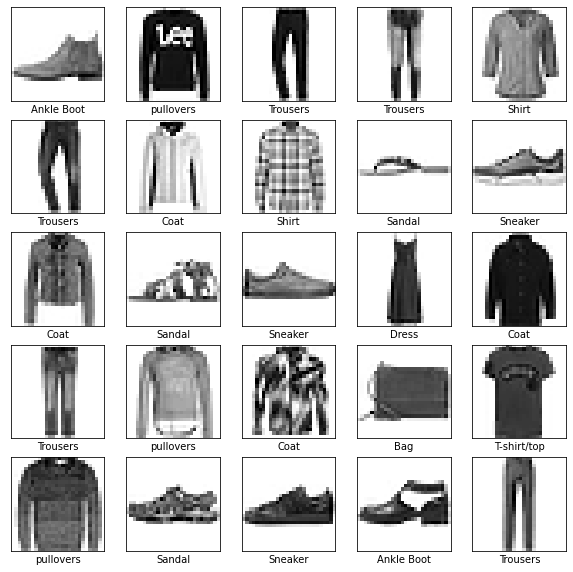

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  
  plt.imshow(test_images[i],cmap=plt.cm.binary)
  
  plt.xlabel(class_name[test_labels[i]])


the index of the test image is  1


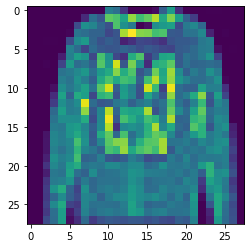

In [82]:
index1=5
plt.imshow(test_images[index])
print("the index of the test image is ", test_labels[index1])

In [97]:
git init

SyntaxError: ignored